# Credit Risk Project
#### Assigned: 2019-03-14
#### Due EoD: 2019-03-28

Analysis of the classic dataset "German Credit", available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29).  
The objective is to develop suitable ML models that forecast credit risk given attributes about the financial and personal situation of a bank customer.

#### Name:  Mengheng Xue
#### NetID: mx586

## Data Set

The dataset is provided in the file `Resources/Data/GermanCredit/credit_data.csv` at the class site.   
This file is the same as the `german.data` file from UCI, except it has column headers.  

The dataset contains 1000 cases of customers who received credit from German banks.  
For each customer, relevant financial and personal information was recorded.  
Whether a customer repaid or defaulted on the loan was also recorded in the "Credit" column.
300 of the 1000 customers failed to repay (Credit=2).  

The 20 attributes and output variable are described in the file `Resources/Data/GermanCredit/credit_metadata.txt`  
There are 13 qualitative and 7 numerical attributes. Each attribute has a descriptive name.   
The values of qualitative (categorical) attributes are codes. The meaning of each code is listed in the metadata file.


## Problem

Propose an optimal classification model that forecasts credit risk (good/bad credit outcome) given the above attributes.  
You can use any of the ML algorithms and metrics we have discussed in class.  
The optimal model must be better than at least one alternative model. 

#### Minimum requirements
+ Basic exploratory data analysis (EDA)
+ Construction of at least two binary classification models to select from
+ Metrics-based arguments about model selection and parameter tuning  
+ If you use other people's work or ideas, add references at the end

#### Submission Format

* Follow the submission rules for homeworks  
* The main document is this notebook, describing the methodology and the conclusions  
* You can put any utility functions in separate source code files and import them into the notebook. 
* Assume that your separate source code files will be side-by-side with the notebook. 
* If you are submitting multiple files, create a zip

Good luck.

## Solution

### import libraries and plot setting

In [7]:
# =====================import libraries =============
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# ====================plot setting ===============
pd.options.display.max_colwidth = 70

plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

sn.set_style('darkgrid')
sn.set_context('notebook', font_scale=1.8)

### Data preprocessing

In [2]:
# import data
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount',
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors',
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing',
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
df = pd.read_csv('credit_data.csv', skiprows=1, names=names)
print("Data dimension: {s}".format(s=df.shape))
print("\nData attributes:\n{a}".format(a=df.columns))
print("\nData type of attributes:\n{t}".format(
    t=df.dtypes))  # data type of attributes
print("\nNo. of missing values: {m}".format(
    m=df.isnull().sum().sum()))  # missing value

df.head(10)

Data dimension: (1000, 21)

Data attributes:
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')

Data type of attributes:
existingchecking         object
duration                  int64
credithistory            object
purpose                  object
creditamount              int64
savings                  object
employmentsince          object
installmentrate           int64
statussex                object
otherdebtors             object
residencesince            int64
property                 object
age                       int64
otherinstallmentplans    object
housing                  object
existingcredits           int64
job                      object
peopleliab

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [3]:
# dataset summary stats; only numeric columns are summarized
df.describe()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [4]:
# categorical variable labels
cat_vars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
            'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job',
            'telephone', 'foreignworker']
# numerical variable labels
num_vars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age',
            'existingcredits', 'peopleliable']

### Outliers in continuous attributes

Text(0.5, 1.0, 'age')

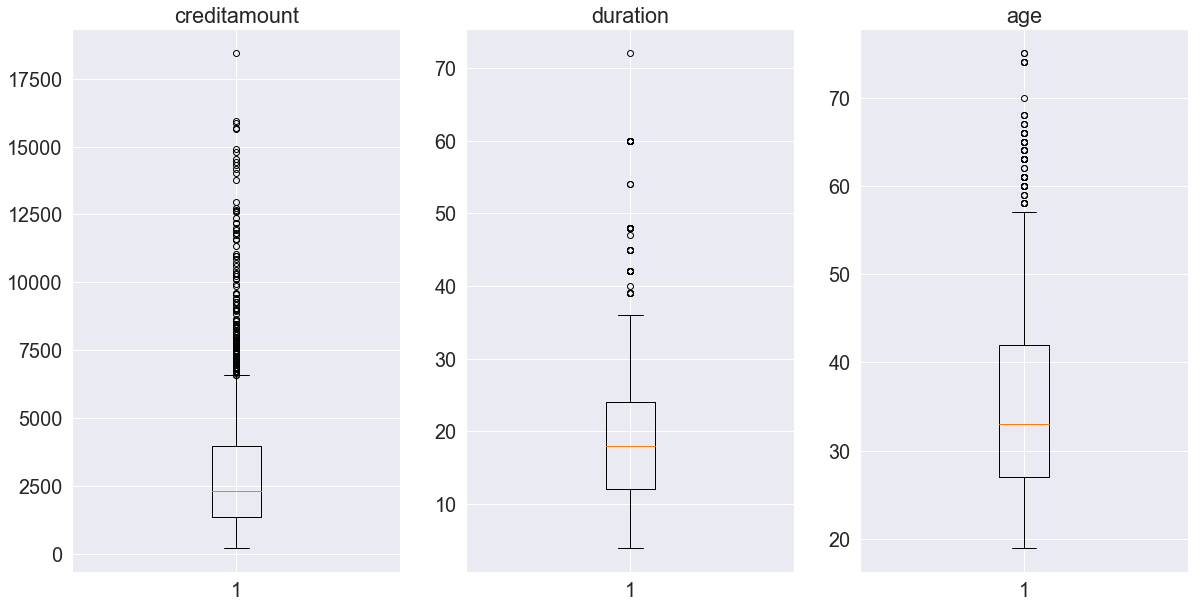

In [8]:
# visualize continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].boxplot(df['creditamount'], sym="o", whis=1)
axes[0].set_title('creditamount')
axes[1].boxplot(df['duration'], sym="o", whis=1)
axes[1].set_title('duration')
axes[2].boxplot(df['age'], sym="o", whis=1)
axes[2].set_title('age')

### EDA: correlations between numerical attributes and output

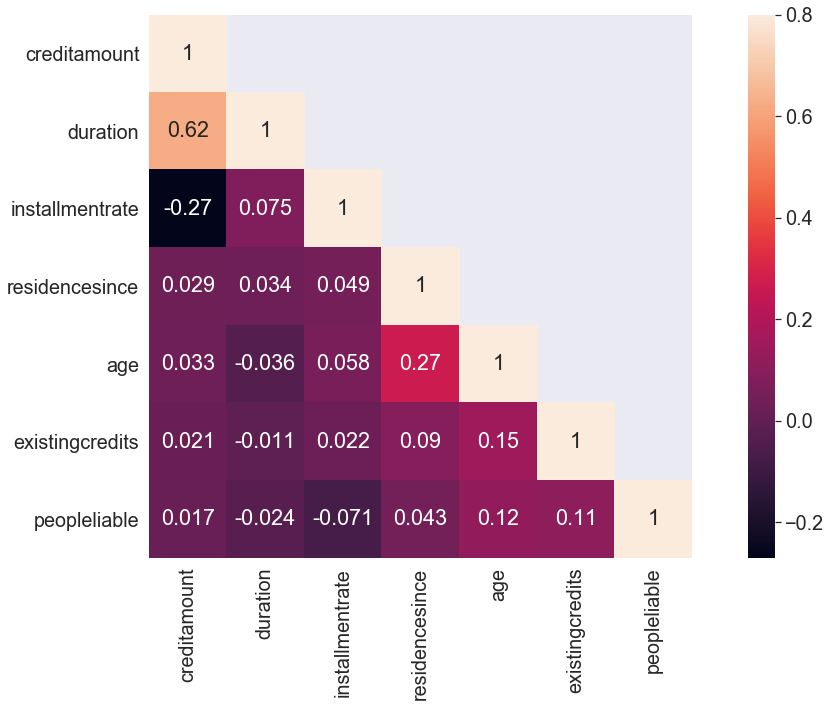

In [9]:
corrMatt = df[num_vars].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

+ Overall correlation levels are not very high
+ Pairs (duration, credit_amount) have high correlation, which is expected.
+ Corrlelation between age and residence_since is relatively high, which is also expected.

### Histograms for non-continuous attributes

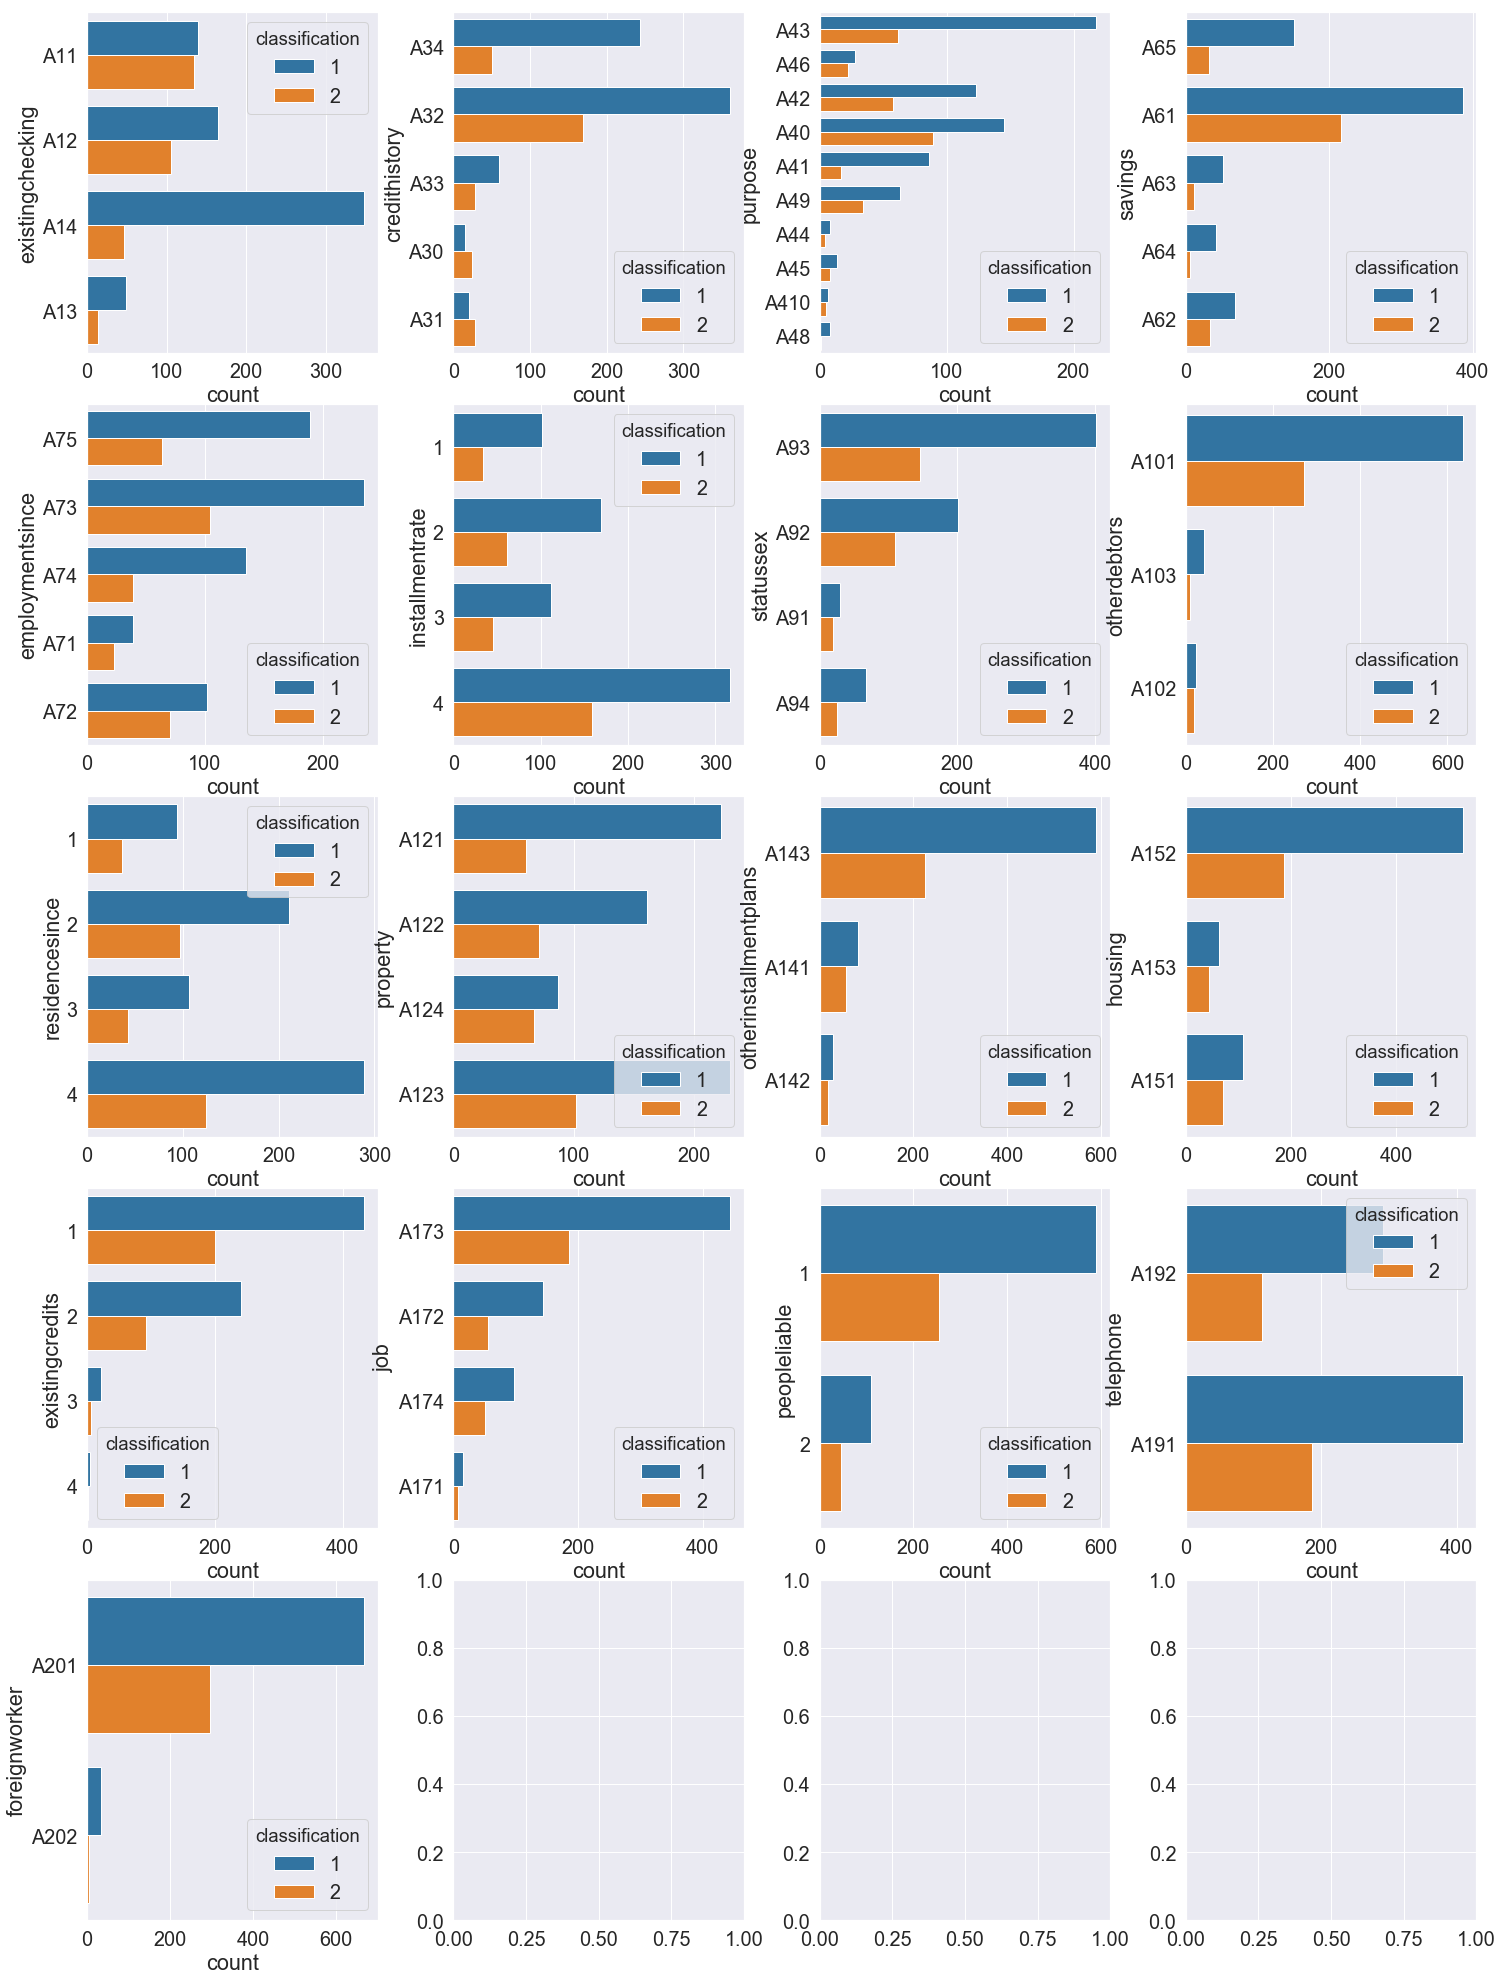

In [10]:
f, axes = plt.subplots(5, 4,figsize=(8.3*3,11.7*3))
plt.subplots_adjust(wspace=0.26, hspace=0.15)
x = 0
y = 0
for column in df.drop(['classification','creditamount','duration','age'], axis=1):
    sn.countplot(y=column, hue="classification", data=df.drop(['creditamount','duration','age'],axis=1), ax=axes[x,y])
    y += 1
    if y > 3:
        x += 1
        y = 0
    if x > 4:
        break

 + We could find that for most non-continuous attributes, good credit has high frequency than bad credit class, which is expected since good credit class dataset is much larger than the bad credit one. 

### Data transformation

In [11]:
# ================= data transformation ======================
# Enables better Visualization than one hot encoding
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = df[cat_vars].apply(lambda x: d[x.name].fit_transform(x))

# One hot encoding
# create dummy variables for every category of every categorical variable
# also avoid the dummy varable trap
dummy_vars = pd.get_dummies(df[cat_vars], drop_first=True)

X = pd.concat([df[num_vars], dummy_vars], axis=1)

# change output to 1: good credit and 0: bad credit for convinent classification
df['classification'].replace([1, 2], [1, 0], inplace=True)
# print numbers of good and bad credits
df['classification'].value_counts()

# separate indep and dep variables
X = X.iloc[:, :].values.astype(float)
y = df.iloc[:, -1].values.astype(float)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression 

In [12]:
# ============logistic regression===============
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

# in sample prediction
y_fit_lr = classifier_lr.predict(X_train)

# Predicting the Test set results
y_pred_lr = classifier_lr.predict(X_test)

# Compute ROC curve AUC
y_prob_lr = classifier_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr, pos_label=None)
roc_auc_lr = auc(fpr_lr, tpr_lr)
print('LR: AUC = %0.2f' % roc_auc_lr)

LR: AUC = 0.74


### Navie Bayes

In [13]:
# ==================Naive Bayes ====================
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# in sample prediction
y_fit_nb = classifier_nb.predict(X_train)

# Predicting the Test set results
y_pred_nb = classifier_nb.predict(X_test)

# Compute ROC curve AUC
y_prob_nb = classifier_nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb, pos_label=None)
roc_auc_nb = auc(fpr_nb, tpr_nb)
print('Navie Bayes: AUC = %0.2f' % roc_auc_nb)

Navie Bayes: AUC = 0.72


### Decison Tree
For decison tree, I try to tune different parameters:
+ I used different criterions: gini and entropy, but the result does not change.
+ I tried to use different max_depth, and obtain the best AUC when max_depth=2. We adjust this parameter to remove branches with weak predictive power in order to reduce the complexity of the model and increase the predictive accuracy of a decision tree model. 
+ min_samples_split is the minimum number of samples required to split an internal node
+ min_samples_leaf has the effect of smoothing the model

In [14]:
# ===========================Decison Tree ====================
# decison tree
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(
    criterion='entropy', max_depth=2, min_samples_split=5, min_samples_leaf=45, random_state=0)
classifier_dt.fit(X_train, y_train)

# in sample prediction
y_fit_dt = classifier_dt.predict(X_train)

# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)


# Compute ROC curve AUC
y_prob_dt = classifier_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt, pos_label=None)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print('Decison Tree: AUC = %0.2f' % roc_auc_dt)

Decison Tree: AUC = 0.75


### Random Forest
I choose number of trees in the forest as 50, and max_depth as 6. Random forest can also easily suffer from the overfitting problem if the tree depth is too deep. So we can reduce max_depth to overcome this problem. 

In [23]:
#==============  random forest ======================
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy',  n_estimators=20, max_depth=6, random_state = 0)
classifier_rf.fit(X_train, y_train)

# in sample prediction 
y_fit_rf = classifier_rf.predict(X_train)

# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

# Compute ROC curve AUC
y_prob_rf = classifier_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=None)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print('Random Forest: AUC = %0.2f' % roc_auc_rf)

Random Forest: AUC = 0.74


### AdaBoost 

In [16]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                                    algorithm="SAMME.R", learning_rate=0.1, random_state=0)
classifier_ada.fit(X_train, y_train)

# in sample prediction
y_fit_ada = classifier_ada.predict(X_train)

# Predicting the Test set results
y_pred_ada = classifier_ada.predict(X_test)

# Compute ROC curve AUC
y_prob_ada = classifier_ada.predict_proba(X_test)[:, 1]
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada, pos_label=None)
roc_auc_ada = auc(fpr_ada, tpr_ada)
print('AdaBoost: AUC = %0.2f' % roc_auc_ada)

AdaBoost: AUC = 0.78


# linear-SVM vs rbf-SVM vs poly-SVM
I compared SVC with different kernels: linear, rbf and poly.  
+ I tuned is 'C' parameter which is the penalty parameter of the error term.
+ I selected class_weight="balanced" which could automatically adjust weights to modify the imblanced dataset problem.
+ Based on my results, rbf SVM obtain the largest AUC = 0.78, thus I choose  rbf SVM as my final SVM classifier. 

In [17]:
# ==============linear SVC======================
# Fitting linear SVM to the Training set
from sklearn.svm import SVC
classifier_lsvm = SVC(kernel='linear', probability=True,
                      C=0.7, class_weight="balanced", random_state=0)
classifier_lsvm.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lsvm = classifier_lsvm.predict(X_test)

# ==============rbf SVM======================
# Fitting rbf SVM to the Training set
classifier_rbfsvm = SVC(kernel='rbf', probability=True,
                        C=0.5, class_weight="balanced", random_state=0)
classifier_rbfsvm.fit(X_train, y_train)

# in sample prediction
y_fit_rbfsvm = classifier_rbfsvm.predict(X_train)

# Predicting the Test set results
y_pred_rbfsvm = classifier_rbfsvm.predict(X_test)

# ==============poly SVM======================
# Fitting rbf SVM to the Training set
# use “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
classifier_polysvm = SVC(kernel='poly', probability=True,
                         C=0.3, class_weight="balanced", random_state=0)
classifier_polysvm.fit(X_train, y_train)

# Predicting the Test set results
y_pred_polysvm = classifier_polysvm.predict(X_test)

# ===================compare ROC curves=====================
y_prob_lsvm = classifier_lsvm.predict_proba(X_test)[:, 1]
y_prob_rbfsvm = classifier_rbfsvm.predict_proba(X_test)[:, 1]
y_prob_polysvm = classifier_polysvm.predict_proba(X_test)[:, 1]

# Compute ROC curve AUC
fpr_lsvm, tpr_lsvm, _ = roc_curve(y_test, y_prob_lsvm, pos_label=None)
fpr_rbfsvm, tpr_rbfsvm, _ = roc_curve(y_test, y_prob_rbfsvm, pos_label=None)
fpr_polysvm, tpr_polysvm, _ = roc_curve(y_test, y_prob_polysvm, pos_label=None)
roc_auc_lsvm = auc(fpr_lsvm, tpr_lsvm)
roc_auc_rbfsvm = auc(fpr_rbfsvm, tpr_rbfsvm)
roc_auc_polysvm = auc(fpr_polysvm, tpr_polysvm)

print('\nlinear SVM: AUC = %0.2f' % roc_auc_lsvm)
print('rbf SVM: AUC = %0.2f' % roc_auc_rbfsvm)
print('poly SVM: AUC = %0.2f' % roc_auc_polysvm)


linear SVM: AUC = 0.74
rbf SVM: AUC = 0.78
poly SVM: AUC = 0.73


### Neural Network

It is unexpected that ANN's performance is a bit disappointing since it should should have stronger perdiction ability. However, we only obtain AUC=0.72. It shows that more powerful model may not have better performace, since ANN can easily suffer from the overfitting problem. We need to adjust parameters such as number of  hidden layers, neurons in each layer, actication funcion and so on.  

In [18]:
# ===================ANN=======================
# Importing the Keras libraries and packages
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense


def create_network():
    # Initialising the ANN
    classifier_nn = Sequential()

    # Adding the input layer and the first hidden layer
    classifier_nn.add(
        Dense(units=75, kernel_initializer='uniform', activation='relu', input_dim=48))

    # Adding the second hidden layer
    classifier_nn.add(
        Dense(units=75, kernel_initializer='uniform', activation='relu'))

    # Adding the output layer
    classifier_nn.add(
        Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

    # Compiling the ANN
    classifier_nn.compile(
        optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Return compiled network
    return classifier_nn


# Wrap Keras model so it can be used by scikit-learn
classifier_nn = KerasClassifier(build_fn=create_network,
                                epochs=200,
                                batch_size=300,
                                verbose=0)
# Fitting the ANN to the Training set
classifier_nn.fit(X_train, y_train)

# in sample prediction
y_fit_nn = classifier_nn.predict(X_train)

# Predicting the Test set results
y_pred_nn = classifier_nn.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5)

# Compute ROC curve AUC
y_prob_nn = classifier_nn.predict_proba(X_test)[:, 1]
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn, pos_label=None)
roc_auc_nn = auc(fpr_nn, tpr_nn)
print('Neural Network: AUC = %0.2f' % roc_auc_nn)

Using TensorFlow backend.


Neural Network: AUC = 0.73


### compare ROC curves

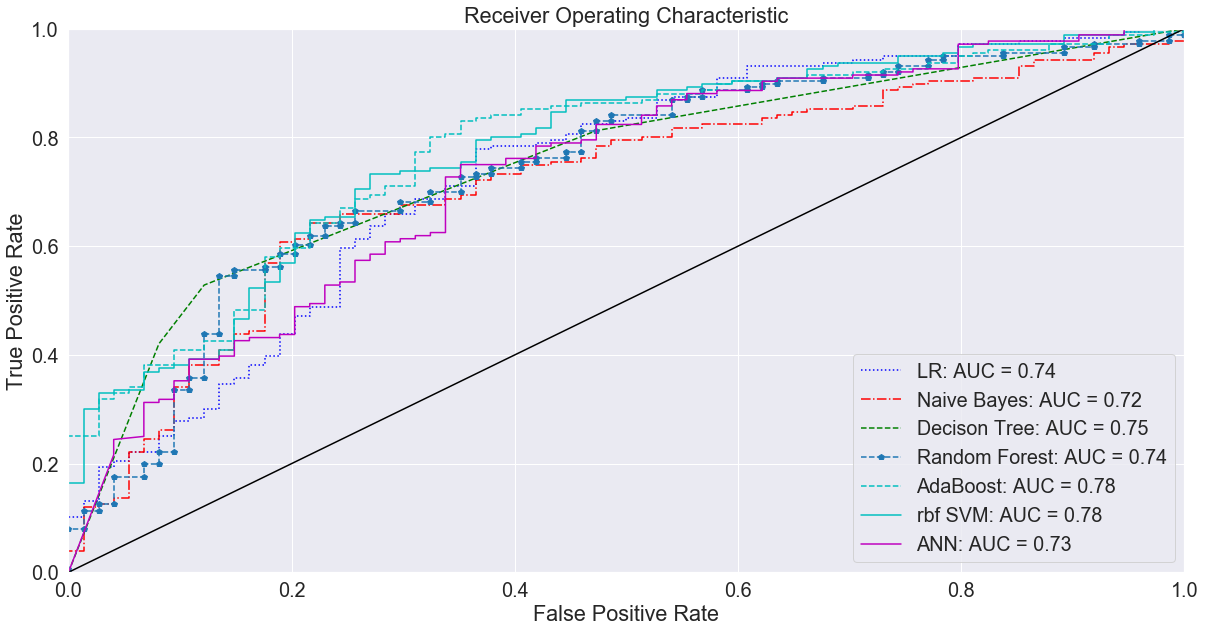

In [19]:
# ===================compare ROC curves=====================
# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b:', label='LR: AUC = %0.2f' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, 'r-.', label='Naive Bayes: AUC = %0.2f' % roc_auc_nb)
plt.plot(fpr_dt, tpr_dt, 'g--', label='Decison Tree: AUC = %0.2f' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, 'p--', label='Random Forest: AUC = %0.2f' % roc_auc_rf)
plt.plot(fpr_ada, tpr_ada, 'c--', label='AdaBoost: AUC = %0.2f' % roc_auc_ada)
plt.plot(fpr_rbfsvm, tpr_rbfsvm, 'c-',
         label='rbf SVM: AUC = %0.2f' % roc_auc_rbfsvm)
plt.plot(fpr_nn, tpr_nn, 'm-', label='ANN: AUC = %0.2f' % roc_auc_nn)


plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

+ Compare AUC for all models, we could find all models AUC are in range from 0.7 to 0.8
+ Also Navie Bayes is not good model in term AUC, since it based on strong assumption that all features are independent which is unrealistic
+ It is unexpected that neural network obtains low  AUC. The reason is that it has the overfitting problem, and more parameter tuning needs to be done. 
+ AdaBoost and rbf SVM achieve the best performance in terms of AUC

### Confusion Matrix
+ class0 : bad credit 
+ class1: good credit

In [24]:
from sklearn.metrics import confusion_matrix

# function to draw confusion matrix
def print_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("test set confusion matrix")
    print('act\pred | class-0  class-1')
    print('---------------------------')
    print('class-0  |{0:8d} {1:8d}'.format(cm[0, 0], cm[0, 1]))
    print('class-1  |{0:8d} {1:8d}'.format(cm[1, 0], cm[1, 1]))


print("Linear Regression: ")
print_confusion_matrix(y_test, y_pred_lr)
print("\nNaive Bayes: ")
print_confusion_matrix(y_test, y_pred_nb)
print("\nDecison Tree: ")
print_confusion_matrix(y_test, y_pred_dt)
print("\nRandom Forest: ")
print_confusion_matrix(y_test, y_pred_rf)
print("\nAdaBoost: ")
print_confusion_matrix(y_test, y_pred_ada)
print("\nrbf SVM: ")
print_confusion_matrix(y_test, y_pred_rbfsvm)
print("\nANN: ")
print_confusion_matrix(y_test, y_pred_nn)

Linear Regression: 
test set confusion matrix
act\pred | class-0  class-1
---------------------------
class-0  |      38       36
class-1  |      30      146

Naive Bayes: 
test set confusion matrix
act\pred | class-0  class-1
---------------------------
class-0  |      48       26
class-1  |      55      121

Decison Tree: 
test set confusion matrix
act\pred | class-0  class-1
---------------------------
class-0  |      39       35
class-1  |      33      143

Random Forest: 
test set confusion matrix
act\pred | class-0  class-1
---------------------------
class-0  |      15       59
class-1  |       9      167

AdaBoost: 
test set confusion matrix
act\pred | class-0  class-1
---------------------------
class-0  |      35       39
class-1  |      21      155

rbf SVM: 
test set confusion matrix
act\pred | class-0  class-1
---------------------------
class-0  |      55       19
class-1  |      57      119

ANN: 
test set confusion matrix
act\pred | class-0  class-1
--------------------

### commpare Accuracy, Precision, Recall, and F1-Score

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_ada = accuracy_score(y_test, y_pred_ada)
acc_rbfsvm = accuracy_score(y_test, y_pred_rbfsvm)
acc_nn = accuracy_score(y_test, y_pred_nn)

prec_lr = precision_score(y_test, y_pred_lr)
prec_nb = precision_score(y_test, y_pred_nb)
prec_dt = precision_score(y_test, y_pred_dt)
prec_rf = precision_score(y_test, y_pred_rf)
prec_ada = precision_score(y_test, y_pred_ada)
prec_rbfsvm = precision_score(y_test, y_pred_rbfsvm)
prec_nn = precision_score(y_test, y_pred_nn)

rec_lr = recall_score(y_test, y_pred_lr)
rec_nb = recall_score(y_test, y_pred_nb)
rec_dt = recall_score(y_test, y_pred_dt)
rec_rf = recall_score(y_test, y_pred_rf)
rec_ada = recall_score(y_test, y_pred_ada)
rec_rbfsvm = recall_score(y_test, y_pred_rbfsvm)
rec_nn = recall_score(y_test, y_pred_nn)

f1_lr = f1_score(y_test, y_pred_lr)
f1_nb = f1_score(y_test, y_pred_nb)
f1_dt = f1_score(y_test, y_pred_dt)
f1_rf = f1_score(y_test, y_pred_rf)
f1_ada = f1_score(y_test, y_pred_ada)
f1_rbfsvm = f1_score(y_test, y_pred_rbfsvm)
f1_nn = f1_score(y_test, y_pred_nn)

print("                    LR         NB         DT         RF         AdaBoost         rbf-SVM         NN")
print("-------------------------------------------------------------------------------------------------------------------------------------")
print("accuracy   {0:8.3f} {1:8.3f}  {2:8.3f}  {3:8.3f}  {4:8.3f}             {5:8.3f}         {6:8.3f} ".format(acc_lr, acc_nb, acc_dt, acc_rf, acc_ada, acc_rbfsvm, acc_nn))
print("precison    {0:8.3f} {1:8.3f}  {2:8.3f}  {3:8.3f}  {4:8.3f}             {5:8.3f}         {6:8.3f} ".format(prec_lr, prec_nb, prec_dt, prec_rf, prec_ada, prec_rbfsvm, prec_nn))
print("recall         {0:8.3f} {1:8.3f}  {2:8.3f}  {3:8.3f}  {4:8.3f}             {5:8.3f}         {6:8.3f} ".format(rec_lr, rec_nb, rec_dt, rec_rf, rec_ada, rec_rbfsvm, rec_nn))
print("F1             {0:8.3f} {1:8.3f}  {2:8.3f}  {3:8.3f}  {4:8.3f}             {5:8.3f}         {6:8.3f} ".format(f1_lr, f1_nb, f1_dt, f1_rf, f1_ada, f1_rbfsvm, f1_nn))

                    LR         NB         DT         RF         AdaBoost         rbf-SVM         NN
-------------------------------------------------------------------------------------------------------------------------------------
accuracy      0.736    0.676     0.728     0.728     0.760                0.696            0.724 
precison       0.802    0.823     0.803     0.739     0.799                0.862            0.792 
recall            0.830    0.688     0.812     0.949     0.881                0.676            0.824 
F1                0.816    0.749     0.808     0.831     0.838                0.758            0.808 


 + In terms of F1 score, AdaBoost is the best model, then random forest.

### Cross Validation
I apply 10 fold cross validation and choose F1 score as scoring parameter. It shows that random forest is the best model. 

In [22]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_lr = cross_val_score(estimator = classifier_lr, X = X_train, y = y_train, cv = 10, scoring='f1')
accuracies_nb = cross_val_score(estimator = classifier_nb, X = X_train, y = y_train, cv = 10, scoring='f1')
accuracies_rbfsvm = cross_val_score(estimator = classifier_rbfsvm, X = X_train, y = y_train, cv = 10, scoring='f1')
accuracies_nn = cross_val_score(estimator = classifier_nn, X = X_train, y = y_train, cv = 10, scoring='f1')
accuracies_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train, cv = 10, scoring='f1')
accuracies_rf = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, cv = 10, scoring='f1')
accuracies_ada = cross_val_score(estimator = classifier_ada, X = X_train, y = y_train, cv = 10, scoring='f1')


print("\n                                LR         NB         DT         RF         AdaBoost         rbf-SVM         NN")
print("-------------------------------------------------------------------------------------------------------------------------------------")
print("cv score mean     {0:8.3f} {1:8.3f}  {2:8.3f}  {3:8.3f}  {4:8.3f}             {5:8.3f}         {6:8.3f}".format(accuracies_lr.mean(), 
                                                                                 accuracies_nb.mean(), accuracies_dt.mean(), accuracies_rf.mean(),
                                                                                 accuracies_ada.mean(), accuracies_rbfsvm.mean(), accuracies_nn.mean()))
print("cv score std         {0:8.3f} {1:8.3f}  {2:8.3f}  {3:8.3f}  {4:8.3f}             {5:8.3f}         {6:8.3f}".format(accuracies_lr.std(), 
                                                                                 accuracies_nb.std(), accuracies_dt.std(), accuracies_rf.std(),
                                                                                 accuracies_ada.std(), accuracies_rbfsvm.std(), accuracies_nn.std()))


                                LR         NB         DT         RF         AdaBoost         rbf-SVM         NN
-------------------------------------------------------------------------------------------------------------------------------------
cv score mean        0.825    0.737     0.802     0.828     0.823                0.765            0.813
cv score std            0.034    0.162     0.025     0.011     0.021                0.057            0.042


### Optimal model
+ Based on all the tests above, since F1 score is wighted averge for precison and recall, which is more comprehensive and cross validation based on F1 score is more objective to evaluate the model performance, I would choose random forest (criterion = 'entropy',  n_estimators=20, max_depth=6) as my optimal model for our credit risk prediction problem, since random forest is one excellent classification model to deal with overfitting problem if we carefully choose parameters such as tree_depth. 
+ More work could be done to improve our model performance to detect the potential bad credit, such as using grid search to choose parameters more carefully, and dealing with the imbalanced dataset problem. 